<a href="https://colab.research.google.com/github/Srividhya-Sainath/Classifier_for_PROVEDit_Dataset/blob/main/Classifier_for_ProvedIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('mount/My Drive/provedIT/Train.csv',header=None)

In [ ]:
label = df.iloc[:,0]
label.head(500)

0      2
1      2
2      2
3      2
4      2
      ..
495    4
496    4
497    4
498    4
499    2
Name: 0, Length: 500, dtype: int64

In [ ]:
value = df.iloc[:,3:]
value.head()

,3,4,5,6,7,8,9,10,11,12,...,293,294,295,296,297,298,299,300,301,302
0,5.0,182.93,5,1.0,184.83,4,7.0,191.14,10,9.0,...,0,0,0,0,0,0,0,0,0,0
1,7.0,191.19,22,8.0,195.24,710,9.0,199.31,425,9.3,...,0,0,0,0,0,0,0,0,0,0
2,1.0,174.53,5,1.0,184.93,6,8.0,195.32,76,9.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,180.77,6,6.0,186.96,8,8.0,195.24,49,9.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,180.00,8,6.0,187.23,442,7.0,191.19,45,7.3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
check = df.iloc[10,0]
print(type(check))

<class 'numpy.int64'>


In [ ]:
## Making the Data set ready for the classifier
class ProvedIT(Dataset):
  def __init__(self,csv_file):
    self.df =  pd.read_csv(csv_file,header=None)
    pass
  def __len__(self):
    return len(self.df)
  def __getitem__(self,index):
    label = int(float(self.df.iloc[index,0]))
    target = torch.zeros((4))
    if label == 2:
      target[0] = 1.0 
    elif label == 3:
      target[1] = 1.0
    elif label == 4:
      target[2] = 1.0
    else :
      target[3] = 1.0
    other_values = self.df.iloc[index,3:].values
    other_values = other_values.astype('float64')
    other_values = torch.FloatTensor(other_values)
    return label,other_values,target
  pass

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

In [ ]:
## Defining the Classifier Model
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    ## defining the Multi layer percepitron
    self.model = nn.Sequential(nn.Linear(300,200), nn.LeakyReLU(0.005),nn.LayerNorm(200),nn.Linear(200,100),nn.LeakyReLU(0.005),nn.LayerNorm(100),nn.Linear(100,4),nn.Sigmoid())
    ## Adding the loss function
    self.loss_function = nn.BCELoss()
    ## Adding Optimiser
    #self.optimiser = torch.optim.SGD(self.parameters(),lr= 0.01)
    self.optimiser = torch.optim.Adam(self.parameters())
    self.counter = 0
    self.progress = []
    pass
  def forward(self, inputs):
    return self.model(inputs)
    pass
  def train(self,inputs,target):
    outputs = self.forward(inputs)
    loss = self.loss_function(outputs,target)
    self.counter += 1
    if self.counter % 10 == 0:
      self.progress.append(loss.item())
      pass
    if self.counter % 1000 == 0:
      print("Counter -", self.counter)
      pass
    # zero gradients, perform a backward pass, and update the weights
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    pass
  def plot_progress(self):
    data = pd.DataFrame(self.progress,columns=["Loss"])
    data.plot(ylim = (0,1.0,), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass
  pass

In [ ]:
## Load the dataset
provedIT = ProvedIT('mount/My Drive/provedIT/Train.csv')

In [ ]:
provedIT[49]

(2,
 tensor([  7.0000, 191.3200,  11.0000,   8.0000, 195.3600, 355.0000,   9.0000,
         199.4000, 150.0000,   9.3000, 202.4200, 468.0000,  12.0000, 211.3600,
          10.0000,   1.0000, 212.4700,  11.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,

In [ ]:
%%time

## Train my Classifier

classifier = Classifier()

epochs = 500

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, other_values_tensor, target_tensor in provedIT:
        classifier.train(other_values_tensor, target_tensor)
        pass
    pass

training epoch 1 of 500
training epoch 2 of 500
Counter - 1000
training epoch 3 of 500
Counter - 2000
training epoch 4 of 500
training epoch 5 of 500
Counter - 3000
training epoch 6 of 500
Counter - 4000
training epoch 7 of 500
training epoch 8 of 500
Counter - 5000
training epoch 9 of 500
Counter - 6000
training epoch 10 of 500
training epoch 11 of 500
Counter - 7000
training epoch 12 of 500
Counter - 8000
training epoch 13 of 500
training epoch 14 of 500
Counter - 9000
training epoch 15 of 500
Counter - 10000
training epoch 16 of 500
training epoch 17 of 500
Counter - 11000
training epoch 18 of 500
Counter - 12000
training epoch 19 of 500
training epoch 20 of 500
Counter - 13000
training epoch 21 of 500
Counter - 14000
training epoch 22 of 500
training epoch 23 of 500
Counter - 15000
training epoch 24 of 500
Counter - 16000
training epoch 25 of 500
training epoch 26 of 500
Counter - 17000
training epoch 27 of 500
Counter - 18000
training epoch 28 of 500
training epoch 29 of 500
Count

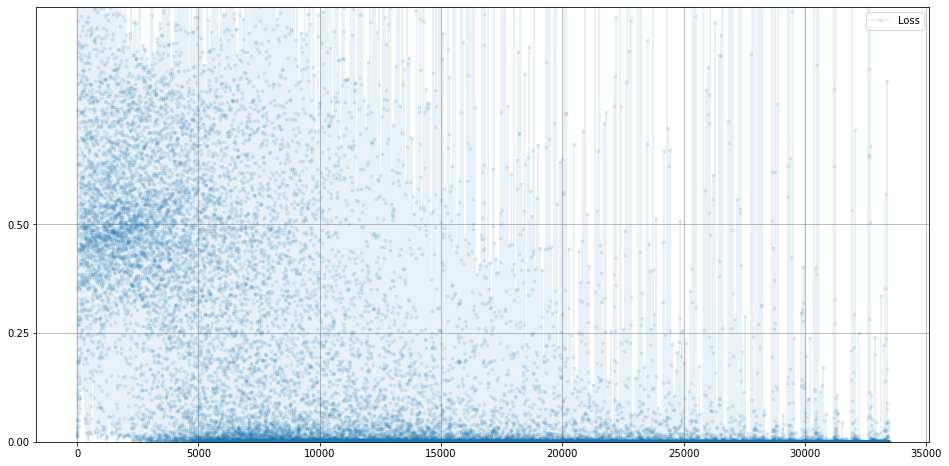

In [ ]:
classifier.plot_progress()

In [ ]:
## Classification Example
provedIT_test = ProvedIT('mount/My Drive/provedIT/Test.csv')

In [ ]:
record = 59
provedIT_test.__getitem__(record)

(5,
 tensor([1.0000e+00, 1.5538e+02, 6.0000e+00, 5.0000e+00, 1.5633e+02, 2.1000e+01,
         6.0000e+00, 1.6036e+02, 1.3030e+03, 7.0000e+00, 1.6438e+02, 4.6400e+02,
         8.0000e+00, 1.6832e+02, 1.6400e+03, 9.0000e+00, 1.7226e+02, 7.3000e+01,
         9.3000e+00, 1.7525e+02, 1.4300e+02, 1.1000e+01, 1.7985e+02, 5.0000e+00,
         1.0000e+00, 1.8608e+02, 5.0000e+00, 1.0000e+00, 1.8799e+02, 8.0000e+00,
         1.0000e+00, 1.8880e+02, 7.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0

In [ ]:
other_values_data = provedIT_test[record][1]

In [ ]:
print(other_values_data)

tensor([1.0000e+00, 1.5538e+02, 6.0000e+00, 5.0000e+00, 1.5633e+02, 2.1000e+01,
        6.0000e+00, 1.6036e+02, 1.3030e+03, 7.0000e+00, 1.6438e+02, 4.6400e+02,
        8.0000e+00, 1.6832e+02, 1.6400e+03, 9.0000e+00, 1.7226e+02, 7.3000e+01,
        9.3000e+00, 1.7525e+02, 1.4300e+02, 1.1000e+01, 1.7985e+02, 5.0000e+00,
        1.0000e+00, 1.8608e+02, 5.0000e+00, 1.0000e+00, 1.8799e+02, 8.0000e+00,
        1.0000e+00, 1.8880e+02, 7.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+

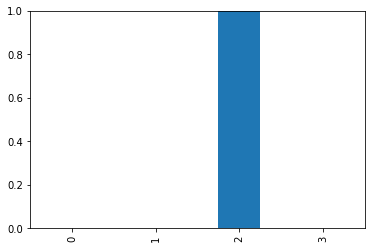

In [ ]:
# query from trained network
output = classifier.forward(other_values_data)

# plot output tensor
pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [ ]:
# test trained neural network on training data

score = 0
items = 0

for label, other_values_tensor, target_tensor in provedIT_test:
    answer = classifier.forward(other_values_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)

10 79 0.12658227848101267
